**Nom et Prénom :**  Nadir OUZLIM & Hanane ATMANI

(Ce mini-projet peut être faire seul ou en binôme)

# Mini projet :  Méthode de gradient à pas spectral
----
Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.

N.B: N'hésitez pas à diviser vos codes en plusieurs cellules quand c'est possible pour faciliter leurs lectures et éxecutions.

----
On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

**Etape 1**

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas fixe) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}; 
\quad 
\text{ pour } k\geq 1
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul du vecteur $u^{(1)}$ avec un pas initial $\rho_0$. A vous de choisir ce premier pas $\rho_0$ comme vous voulez.


In [469]:
import numpy as np

# Parameters of the problem
N = 10 # number of grid points
rho0 = 0.1
K = 1000 # number of iterations
eps = 1e-6 # precision

u0 = np.array([0]*N)
u = np.zeros(N)
uNext = np.zeros(N)

def U1(J):
    return u0 - rho0 * J(u0)[1]

# Facilitation de la lecture
def S(u2,u1):
    result = u2 - u1
    return result

def Y(u2,u1,J):
    return J(u2)[1] - J(u1)[1]

In [470]:
## implémenter l'algorithme BB1 
def RHO1(u2,u1,J):
    return np.dot(S(u2,u1),S(u2,u1)) / np.dot(Y(u2,u1,J),S(u2,u1))
def BB1(J):
    global u
    newVal = uNext - RHO1(uNext,u,J) * J(uNext)[1]
    
    u = uNext
    return newVal

In [471]:
## implémenter l'algorithme BB2
def RHO2(u2,u1,J):
    return np.dot(S(u2,u1),Y(u2,u1,J)) / np.dot(Y(u2,u1,J),Y(u2,u1,J))
def BB2(J):
    global u
    newVal = uNext - RHO2(uNext,u,J) * J(uNext)[1]
    
    u = uNext
    return newVal

----
**Etape 2**

> Effectuer les tests de validation pour les fonctions quadratiques suivantes ($N=10$): 

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$


In [472]:
def J1 (v): # fonction et gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v): # fonction et gradient
    N = len(v)
    r = np.arange (1,N+1)
    return [np.dot(v-r,v-r), 2*(v-r)]

w = []
def opt(BBi,J):
    k=0
    global uNext
    global w
    w.append(u)
    w.append(uNext)
    while eps < np.linalg.norm(J(uNext)[1]) and (k < K):
        uNext = BBi(J)
        w.append(uNext)
        k += 1
    print(BBi.__name__,': Nombre iterations = ',k+1)

In [473]:
# Test de l'algorithme BB1 pour J1
u = u0
uNext = U1(J1)

opt(BB1,J1)
print('U optimal : ',uNext)

BB1 : Nombre iterations =  2
U optimal :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [474]:
# Test de l'algorithme BB1 pour J2
u = u0
uNext = U1(J1)

opt(BB1,J2)
print('U optimal : ',uNext)

BB1 : Nombre iterations =  2
U optimal :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


----
**Etape 3**

On considère les fonctions suivantes (en dimension $N$): 

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$ et la fonction de Rosenbrock 

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 (pour $N=10, 20, 40$), et comparer les performances de ces deux variantes en traçant sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

In [475]:
# Definition de J5, J6 et JR
def tridiag(a,b,c,N):
    return np.diag(a*np.ones(N-1),-1) + np.diag(b*np.ones(N),0) + np.diag(c*np.ones(N-1),1)

def J5(v):
    N = len(v)
    f = np.ones(N)
    A = tridiag(-1,2,-1,N)
    
    fct = 0.5 * (( A @ v ) @ v) - (f @ v) + np.sum(v**2)
    grad = A @ v - f + 2*v

    return [fct,grad]

def J6(v):
    N = len(v)
    f = np.ones(N)
    A = tridiag(-1,2,-1,N)
    
    fct = 0.5 * (( A @ v ) @ v) - (f @ v) + np.sum(v**4)
    grad = A @ v - f + 4*v**3

    return [fct,grad]

def JR (v):
    N = len (v)
    
    w1, w2,ones = v[:-1] , v[1:], np.ones(N-1)
    dw1 = w2 - w1*w1
    dw2 = w1 - ones
    
    diff1 = np.zeros(N)
    diff1[1: ]  = 2*dw1
    diff1[:-1] -= 4*w1*dw1

    diff2 = np.zeros(N)
    diff2[:-1] = 2*dw2

    fct = (dw1@dw1) + (dw2@dw2)
    grad = diff1 + diff2

    return [fct,grad]

#def JR (v):
    N = len (v)

    ones = np.ones (N)
    
    fct = 0
    for i in range(0,N-1):
        fct += (v[i+1]-v[i]**2)**2 + (v[i]-1)**2    
    
    grad = np.zeros(N)
    for i in range(0,N):
        if i == 0 :
            grad[i] = -4 * v[i] * (v[i+1] - v[i]**2 ) + 2 * (v[i]-1)
        elif i < N-1 : 
            grad[i] = -4 * (v[i+1]-v[i]**2) + 2*(v[i]-1) + 2*(v[i]-v[i-1]**2)
        else :
            grad[i] = 2*(v[i]-v[i-1]**2)
            
    return [fct,grad]

#def JR(v):
    N = len(v)
    V1 = np.array([(v[i + 1] - v[i] ** 2) for i in range(len(v) - 1)])
    V2 = np.array([(v[i] - 1) for i in range(len(v) - 1)])
    gardJR = [0] * N  # Initialiser gardJR avec des zéros

    gardJR[0] = -4 * v[0] * V1[0] + 2 * V2[0]
    for i in range(1, N - 1):
        gardJR[i] = 2 * (v[i] - v[i - 1] ** 2) - 4 * v[i] * V1[i] + 2 * V2[i]

    gardJR[N - 1] = 2 * (v[N - 1] - v[N - 2] ** 2)
    grad = np.array(gardJR)
    fct = np.dot(V1, V1) + np.dot(V2, V2)
    return [fct, grad]


N =  10
BB1 : Nombre iterations =  14
BB2 : Nombre iterations =  12

N =  20
BB1 : Nombre iterations =  14
BB2 : Nombre iterations =  14

N =  40
BB1 : Nombre iterations =  14
BB2 : Nombre iterations =  14



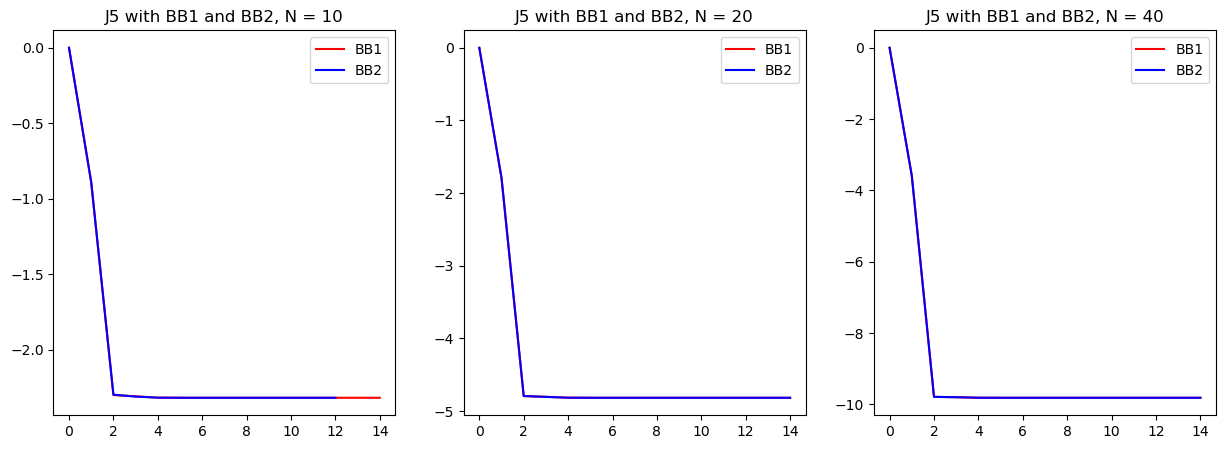

In [476]:
import matplotlib.pyplot as plt

# Minimisation de J5 par BB1 et BB2 pour différents N
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, N in enumerate([10, 20, 40]):
    print('N = ', N)
    u0 = np.array([0]*N)
    u = np.zeros(N)
    uNext = np.zeros(N)

    # J5 with BB1
    u = u0
    uNext = U1(J5)
    w = []
    opt(BB1, J5)
    X1J5 = np.linspace(0, len(w)-1, len(w))
    X1J5 = X1J5.astype(int)
    Y1J5 = [J5(w[i])[0] for i in X1J5]
    axs[i].plot(X1J5, Y1J5, '-r', label='BB1')

    # J5 with BB2
    u = u0
    uNext = U1(J5)
    w = []
    opt(BB2, J5)
    X2J5 = np.linspace(0, len(w)-1, len(w))
    X2J5 = X2J5.astype(int)
    Y2J5 = [J5(w[i])[0] for i in X2J5]
    axs[i].plot(X2J5, Y2J5, '-b', label='BB2')

    axs[i].legend()
    axs[i].set_title('J5 with BB1 and BB2, N = ' + str(N))
    print()

plt.show()


N =  10
BB1 : Nombre iterations =  16
BB2 : Nombre iterations =  15

N =  20
BB1 : Nombre iterations =  18
BB2 : Nombre iterations =  17

N =  40
BB1 : Nombre iterations =  20
BB2 : Nombre iterations =  18



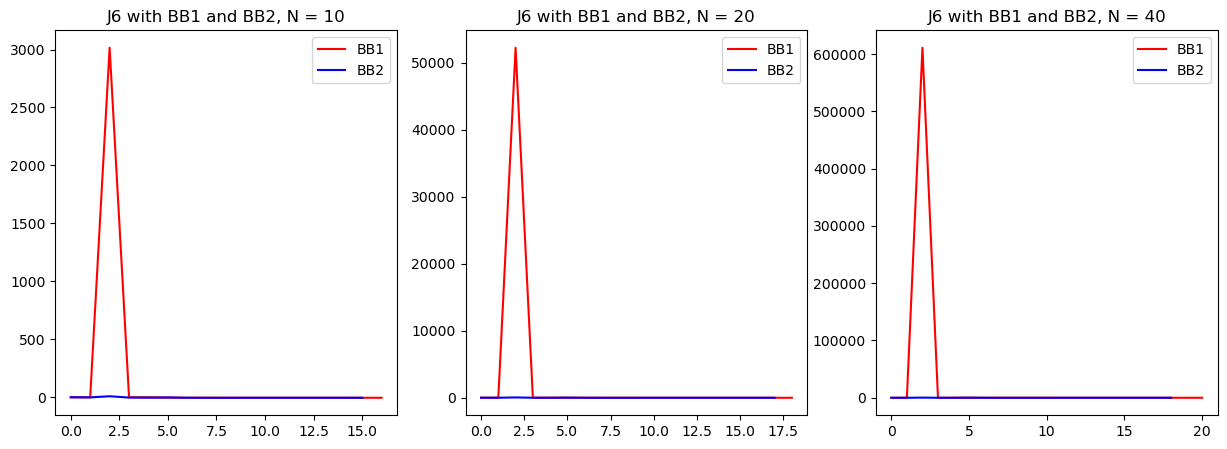

In [477]:
# Minimisation de J6 par BB1 et BB2 pour différents N
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, N in enumerate([10, 20, 40]):
    print('N = ', N)
    u0 = np.array([0]*N)
    u = np.zeros(N)
    uNext = np.zeros(N)

    # J6 with BB1
    u = u0
    uNext = U1(J6)
    w = []
    opt(BB1, J6)
    X1J6 = np.linspace(0, len(w)-1, len(w))
    X1J6 = X1J6.astype(int)
    Y1J6 = [J6(w[i])[0] for i in X1J6]
    axs[i].plot(X1J6, Y1J6, '-r', label='BB1')

    # J6 with BB2
    u = u0
    uNext = U1(J6)
    w = []
    opt(BB2, J6)
    X2J6 = np.linspace(0, len(w)-1, len(w))
    X2J6 = X2J6.astype(int)
    Y2J6 = [J6(w[i])[0] for i in X2J6]
    axs[i].plot(X2J6, Y2J6, '-b', label='BB2')

    axs[i].legend()
    axs[i].set_title('J6 with BB1 and BB2, N = ' + str(N))
    print()

plt.show()

N =  10
BB1 : Nombre iterations =  70
BB2 : Nombre iterations =  62

N =  20
BB1 : Nombre iterations =  74
BB2 : Nombre iterations =  70

N =  40
BB1 : Nombre iterations =  68
BB2 : Nombre iterations =  58



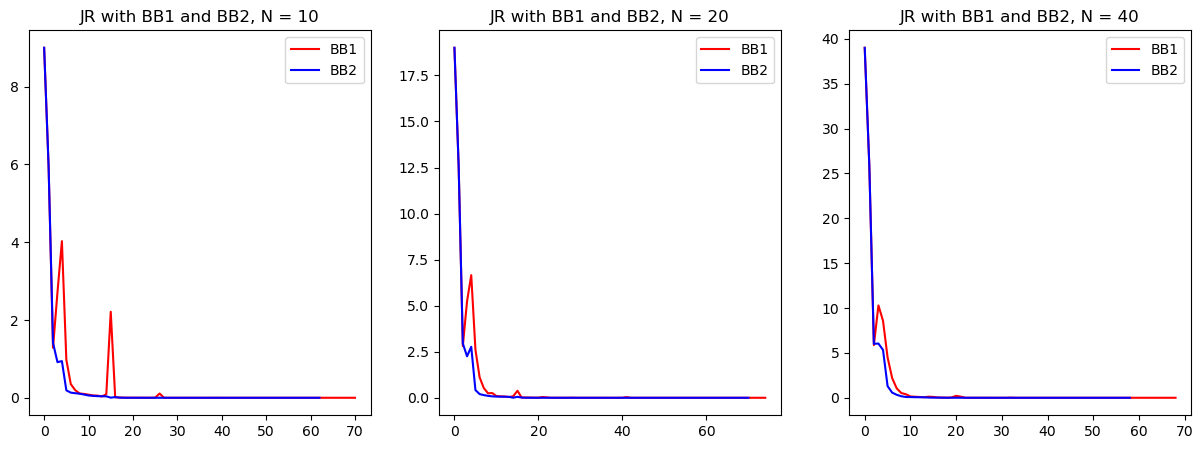

In [478]:
# Minimisation de JR par BB1 et BB2 pour différents N
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, N in enumerate([10, 20, 40]):
    print('N = ', N)
    u0 = np.array([0]*N)
    u = np.zeros(N)
    uNext = np.zeros(N)

    # JR with BB1
    u = u0
    uNext = U1(JR)
    w = []
    opt(BB1, JR)
    X1JR = np.linspace(0, len(w)-1, len(w))
    X1JR = X1JR.astype(int)
    Y1JR = [JR(w[i])[0] for i in X1JR]
    axs[i].plot(X1JR, Y1JR, '-r', label='BB1')

    # JR with BB2
    u = u0
    uNext = U1(JR)
    w = []
    opt(BB2, JR)
    X2JR = np.linspace(0, len(w)-1, len(w))
    X2JR = X2JR.astype(int)
    Y2JR = [JR(w[i])[0] for i in X2JR]
    axs[i].plot(X2JR, Y2JR, '-b', label='BB2')

    axs[i].legend()
    axs[i].set_title('JR with BB1 and BB2, N = ' + str(N))
    print()

plt.show()

**Etape 4**

> Comparer pour la fonction $J_R$ les performances des méthodes BB1 (ou BB2) et de l'algorithme NLCG (Fletcher-Reeves à pas constant) développé en TP2 : Comme avant, cette comparaison doit être faite en traçant les courbes de $J(u^{(k)})$ en fonction des itérations $k$ pour les différents algorithmes. 

> Refaire la même chose pour la fonction $J_H$ (du TP1).

On rappelle que $J_H$ est donnée par $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.

NLGC : Nombre iterations =  359 (inferieur a 1500 a cause d overflow)
BB1 : Nombre iterations =  70


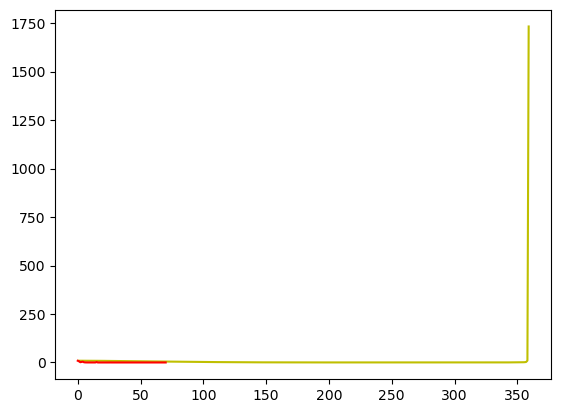

In [479]:
def NLGC(J,n):
    N = n
    rho = 0.0001
    eps = 1.e-6
    err = 1.e-7
    kmax = 1500
    
    u = np.zeros(N)
    d = J(u)[1]
    tab = []
    for i in range(kmax):
        norme = np.linalg.norm(d)
        if norme < err : break
        if norme > 1e10: break  # Add this line to check for overflow
        tab.append(u)
        uplus = u - rho * d
        beta = np.dot(J(uplus)[1],J(uplus)[1]) / np.dot(J(u)[1],J(u)[1])
        u = uplus
        d = J(u)[1] + beta * d
        k = i+1
    return u,k,tab

N = 10
# plot NLGC JR
G = NLGC(JR,N)
k = G[1]
print(NLGC.__name__,': Nombre iterations = ',k,'(inferieur a 1500 a cause d overflow)')
k_value = np.linspace(1,k,k)
k_value = k_value.astype(int)
u0_value = [JR(u)[0] for u in G[2]]
plt.plot(k_value,u0_value,"y",label="NLGC")

# plot JR BB1
u0 = np.array([0]*N)
u = np.zeros(N)
uNext = np.zeros(N)
u = u0
uNext = U1(JR)
w = []
opt(BB1, JR)
X1JR = np.linspace(0, len(w)-1, len(w))
X1JR = X1JR.astype(int)
Y1JR = [JR(w[i])[0] for i in X1JR]
plt.plot(X1JR, Y1JR, '-r', label='BB1')

plt.show()

# $J_H$

In [480]:
def JH(V):
    x = V[0]
    y = V[1]

    fct = (V[0]**2+V[1]-2)**2 +(V[1]**2-2*V[0]+1)**2
    
    w1= 4*(x**3 - y**2 + x*y - 1)
    w2= 4*y**3 + 2*x**2 + 6*y - 8*x*y - 4
    grad =np.array([w1, w2])

    return [fct, grad]

NLGC : Nombre iterations =  774
BB1 : Nombre iterations =  13


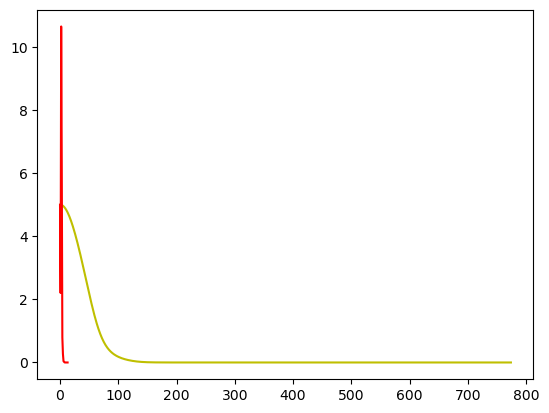

In [482]:
N = 2
# plot NLGC JH
G = NLGC(JH,N)
k = G[1]
print(NLGC.__name__,': Nombre iterations = ',k)
k_value = np.linspace(1,k,k)
k_value = k_value.astype(int)
u0_value = [JH(u)[0] for u in G[2]]
plt.plot(k_value,u0_value,"y",label="NLGC")

# plot JH BB1
u0 = np.array([0]*N)
u = np.zeros(N)
uNext = np.zeros(N)
u = u0
uNext = U1(JH)
w = []
opt(BB1, JH)
X1JH = np.linspace(0, len(w)-1, len(w))
X1JH = X1JH.astype(int)
Y1JH = [JH(w[i])[0] for i in X1JH]
plt.plot(X1JH, Y1JH, '-r', label='BB1')

plt.show()